# Estadistica descriptiva


In [1]:
import pandas as pd

# Set to see all columns
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
csv_file = 'data/01_bronze/2018.csv'
df = pd.read_csv(csv_file)
df.shape

(7213446, 28)

In [4]:
# Visualizamos informacion de la columna DEP_DELAY
df.DEP_DELAY.info()

# Contamos la cantidad de valores nulos
df.DEP_DELAY.isna().sum()

<class 'pandas.core.series.Series'>
RangeIndex: 7213446 entries, 0 to 7213445
Series name: DEP_DELAY
Non-Null Count    Dtype  
--------------    -----  
7096212 non-null  float64
dtypes: float64(1)
memory usage: 55.0 MB


117234

In [5]:
# Nos quedamos con los DEP_DELAY que tienen datos
df = df[df['DEP_DELAY'].notna()]
df.shape

(7096212, 28)

In [24]:
# Check unique values in OP_CARRIER (airline) column
df.OP_CARRIER.unique()

array(['UA', 'AS', '9E', 'B6', 'EV', 'F9', 'G4', 'HA', 'MQ', 'NK', 'OH',
       'OO', 'VX', 'WN', 'YV', 'YX', 'AA', 'DL'], dtype=object)

In [10]:
# Renaming airline codes to company names
# Source: https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States

df['OP_CARRIER'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
},inplace=True)

In [70]:
df.ORIGIN.unique()

array(['EWR', 'LAS', 'SNA', 'RSW', 'ORD', 'IAH', 'DEN', 'SMF', 'RIC',
       'PDX', 'MCO', 'TYS', 'SFO', 'JAC', 'BOS', 'MSY', 'MIA', 'SEA',
       'SAT', 'SLC', 'RDU', 'FLL', 'IAD', 'DFW', 'ANC', 'MSP', 'ALB',
       'LAX', 'IND', 'SAN', 'BNA', 'BDL', 'ABQ', 'SAV', 'PHX', 'AUS',
       'PHL', 'SJC', 'ORF', 'DCA', 'LGA', 'BWI', 'PIT', 'OGG', 'CLE',
       'TPA', 'MYR', 'ROC', 'SJU', 'EGE', 'HNL', 'ONT', 'PBI', 'MKE',
       'HDN', 'JAX', 'OKC', 'ATL', 'SRQ', 'BZN', 'EUG', 'BOI', 'RNO',
       'GEG', 'TUS', 'LIH', 'KOA', 'ITO', 'PSP', 'DTW', 'GUC', 'OMA',
       'MTJ', 'CLT', 'CHS', 'MCI', 'BIL', 'CVG', 'CID', 'MEM', 'AVL',
       'BUF', 'GUM', 'JFK', 'ADQ', 'BET', 'SCC', 'BRW', 'FAI', 'JNU',
       'KTN', 'SIT', 'PSG', 'OME', 'OTZ', 'BUR', 'OAK', 'BLI', 'SBA',
       'STL', 'GFK', 'SYR', 'GSP', 'FSD', 'DSM', 'ILM', 'PWM', 'BIS',
       'JAN', 'GRB', 'OAJ', 'BTV', 'TLH', 'LAN', 'MSN', 'BMI', 'BGR',
       'ABY', 'MOT', 'DHN', 'LEX', 'MDT', 'CMH', 'FSM', 'HSV', 'FAR',
       'BQK', 'GSO',

In [26]:
# Let's explore column CANCELLED
df.CANCELLED.unique()

array([0., 1.])

In [15]:
# Total number of canceled flights
df.CANCELLED.sum()

4093.0

In [8]:
# Veamos los vuelos cancelados. Vemos que aportan al DEP_DELAY
#df[df['CANCELLED']==1].head()
df[df['CANCELLED']==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116584 entries, 178 to 7212773
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FL_DATE              116584 non-null  object 
 1   OP_CARRIER           116584 non-null  object 
 2   OP_CARRIER_FL_NUM    116584 non-null  int64  
 3   ORIGIN               116584 non-null  object 
 4   DEST                 116584 non-null  object 
 5   CRS_DEP_TIME         116584 non-null  int64  
 6   DEP_TIME             4267 non-null    float64
 7   DEP_DELAY            4093 non-null    float64
 8   TAXI_OUT             754 non-null     float64
 9   WHEELS_OFF           755 non-null     float64
 10  WHEELS_ON            0 non-null       float64
 11  TAXI_IN              0 non-null       float64
 12  CRS_ARR_TIME         116584 non-null  int64  
 13  ARR_TIME             0 non-null       float64
 14  ARR_DELAY            0 non-null       float64
 15  CANCELLED     

In [8]:
# OPTIONAL: Leaving only non-canceled flights
df = df[(df['CANCELLED'] == 0)]
df.shape

In [20]:
# Departure delay data (in minutes)
df.DEP_DELAY.head()

0    -5.0
1    -8.0
2    -5.0
3     6.0
4    20.0
Name: DEP_DELAY, dtype: float64

In [21]:
# Arrival delay data (in minutes)
df.ARR_DELAY.head()

0   -23.0
1   -24.0
2   -13.0
3    -2.0
4    14.0
Name: ARR_DELAY, dtype: float64

In [36]:
# To do this analysis right, let's filter all negative numbers in ARR_DELAY column
# Number of delayed flights 
df[df.ARR_DELAY > 0 ].FL_DATE.count()

AttributeError: 'DataFrame' object has no attribute 'FL_DATE'

In [6]:
# total de registros
total = int(df.shape[0])
total_delay = int(df[(df.DEP_DELAY > 0) | (df.ARR_DELAY > 0)].FL_DATE.count())

# only departure delayed
dep_delay_only = int(df[(df.DEP_DELAY > 0) & (df.ARR_DELAY <= 0)].FL_DATE.count())

# only arribal delayed
arr_delay_only = int(df[(df.DEP_DELAY <= 0) & (df.ARR_DELAY > 0)].FL_DATE.count())

# departure and arribal delayed
dep_arr_delay = int(df[(df.DEP_DELAY > 0) & (df.ARR_DELAY > 0)].FL_DATE.count())

dep_delay = (dep_delay_only/total_delay) * 100
arr_delay = (arr_delay_only/total_delay) * 100
all_delay = (dep_arr_delay/total_delay) * 100

print(f"Departure delay only: {dep_delay}")
print(f"Arraival delay only: {arr_delay}")
print(f"All delayed: {all_delay}")


Departure delay only: 20.60811129228362
Arraival delay only: 23.052463579612752
All delayed: 55.95717207513737


In [ ]:
# Desvios
df.DIVERTED.unique()

In [45]:
# ni pincha no corta. Me olvido
df[df.DIVERTED > 0].head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
1168,2018-01-01,UA,555,SFO,SAN,729,718.0,-11.0,17.0,735.0,1124.0,3.0,903,1127.0,NaN,0.0,NaN,1.0,94.0,NaN,NaN,447.0,NaN,NaN,NaN,NaN,NaN,NaN
1638,2018-01-01,AS,64,PSG,WRG,1514,1626.0,72.0,20.0,1646.0,NaN,NaN,1538,NaN,NaN,0.0,NaN,1.0,24.0,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN
1643,2018-01-01,AS,65,KTN,WRG,925,918.0,-7.0,26.0,944.0,NaN,NaN,1011,NaN,NaN,0.0,NaN,1.0,46.0,NaN,NaN,82.0,NaN,NaN,NaN,NaN,NaN,NaN
1683,2018-01-01,AS,120,SEA,SAN,550,544.0,-6.0,18.0,602.0,1046.0,3.0,840,1049.0,NaN,0.0,NaN,1.0,170.0,NaN,NaN,1050.0,NaN,NaN,NaN,NaN,NaN,NaN
1850,2018-01-01,AS,512,SEA,SAN,725,722.0,-3.0,16.0,738.0,1216.0,3.0,1017,1219.0,NaN,0.0,NaN,1.0,172.0,NaN,NaN,1050.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56882,2018-01-03,DL,2742,ATL,FAY,2029,2049.0,20.0,16.0,2105.0,1243.0,6.0,2144,1249.0,NaN,0.0,NaN,1.0,75.0,NaN,NaN,331.0,NaN,NaN,NaN,NaN,NaN,NaN
57542,2018-01-04,B6,16,SFO,JFK,700,656.0,-4.0,19.0,715.0,NaN,NaN,1525,NaN,NaN,0.0,NaN,1.0,325.0,NaN,NaN,2586.0,NaN,NaN,NaN,NaN,NaN,NaN
57548,2018-01-04,B6,24,LAX,JFK,600,550.0,-10.0,30.0,620.0,NaN,NaN,1415,NaN,NaN,0.0,NaN,1.0,315.0,NaN,NaN,2475.0,NaN,NaN,NaN,NaN,NaN,NaN
57560,2018-01-04,B6,54,PBI,JFK,700,653.0,-7.0,14.0,707.0,NaN,NaN,939,NaN,NaN,0.0,NaN,1.0,159.0,NaN,NaN,1028.0,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df[['FL_DATE', 'DEP_DELAY', 'ARR_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'CANCELLED', 'DIVERTED']].head()

,FL_DATE,DEP_DELAY,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,CANCELLED,DIVERTED
0,2018-01-01,-5.0,-23.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2018-01-01,-8.0,-24.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2018-01-01,-5.0,-13.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2018-01-01,6.0,-2.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,2018-01-01,20.0,14.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [7]:
# Nos quedamos solo con las demoras al partir > 0
#df_dep_delay = df[df['DEP_DELAY']>0]

# O seguimos con el mismo dataset que teníamos pero haciendo una copia
df_dep_delay = df.copy()
df_dep_delay.shape

(7096212, 28)

In [8]:
# calculamos promedio de demora de partida por origen y dia (opcion 1)
#df_mean_dep_delay = df_dep_delay.groupby(["ORIGIN", "FL_DATE"])[["DEP_DELAY"]]\
#    .mean().sort_values(by='DEP_DELAY',ascending=False)

# calculamos promedio de demora de partida por origen y dia (opcion 2)
df_mean_dep_delay = df_dep_delay.groupby(["ORIGIN", "FL_DATE"])\
    .agg(MEAN_DEP_DELAY=('DEP_DELAY', 'mean'))\
    .reset_index()
    #.sort_values(by='MEAN_DEP_DELAY', ascending=False)\
    

# Top 10 promedios
#df_mean_dep_delay = df_dep_delay.groupby(["ORIGIN", "FL_DATE"])[["DEP_DELAY"]]\
#    .mean().sort_values(by='DEP_DELAY',ascending=False)[:10]
    
#df_mean_dep_delay = df_mean_dep_delay.reset_index()
#df_mean_dep_delay.reset_index(inplace=True)
#df_mean_dep_delay['ORIGIN'].isnull().sum()

df_mean_dep_delay

,ORIGIN,FL_DATE,MEAN_DEP_DELAY
0,ABE,2018-01-01,7.833333
1,ABE,2018-01-02,77.375000
2,ABE,2018-01-03,51.333333
3,ABE,2018-01-04,30.125000
4,ABE,2018-01-05,17.375000
...,...,...,...
121460,YUM,2018-12-27,4.250000
121461,YUM,2018-12-28,2.250000
121462,YUM,2018-12-29,3.500000
121463,YUM,2018-12-30,3.750000


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

# runtime configuration (rc) containing the default styles for every plot element
plt.rcParams['figure.figsize']=(16,6) 

## Analizamos el ORIGIN = JFK

In [10]:
data = df_mean_dep_delay[df_mean_dep_delay['ORIGIN']=='JFK']

# Metodo mas rebuscado pero se muestra como alternativa
# En la nueva columna 'select', marcamos con -1 los registros que no son 'JFK'
#df_mean_dep_delay['select'] = df_mean_dep_delay['ORIGIN'].apply(lambda x: x.find('JFK'))
#data = df_mean_dep_delay[df_mean_dep_delay['select'] != -1].drop('select', axis=1)

data

,ORIGIN,FL_DATE,MEAN_DEP_DELAY
59906,JFK,2018-01-01,18.311475
59907,JFK,2018-01-02,18.047478
59908,JFK,2018-01-03,10.893548
59909,JFK,2018-01-04,71.066667
59910,JFK,2018-01-05,154.356164
...,...,...,...
60266,JFK,2018-12-27,4.470430
60267,JFK,2018-12-28,29.405914
60268,JFK,2018-12-29,13.348571
60269,JFK,2018-12-30,8.064171


array([[<AxesSubplot:title={'center':'MEAN_DEP_DELAY'}>]], dtype=object)

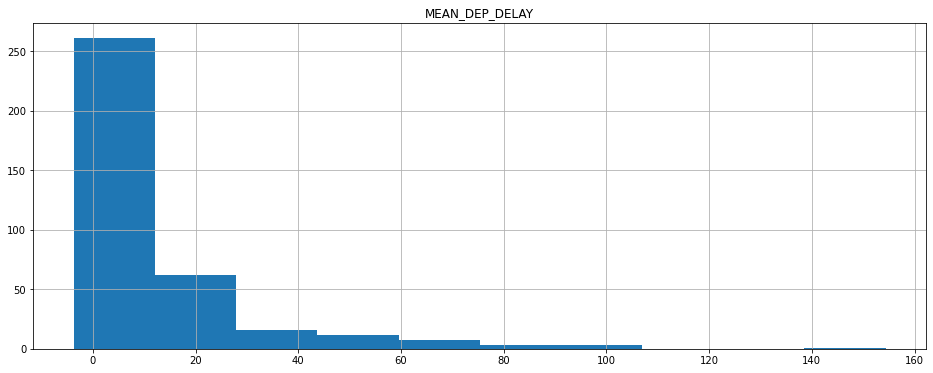

In [11]:
data.hist()

<AxesSubplot:xlabel='FL_DATE'>

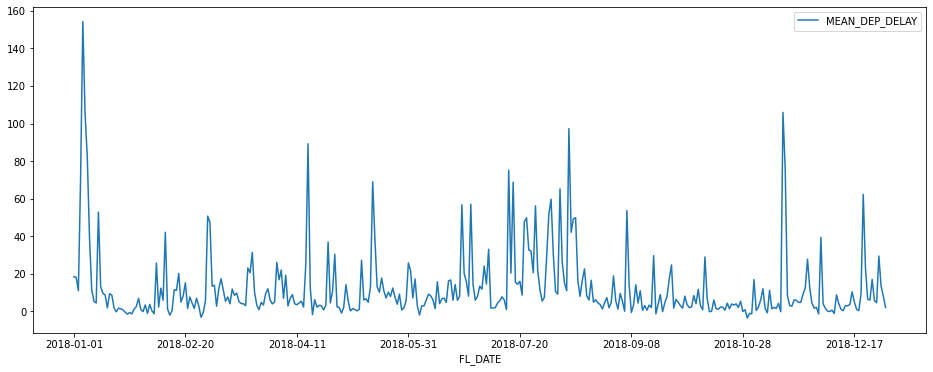

In [50]:
data.plot(x='FL_DATE', y='MEAN_DEP_DELAY')

In [51]:
# Desviación standard
data.std()

MEAN_DEP_DELAY    18.998573
dtype: float64

<AxesSubplot:xlabel='FL_DATE'>

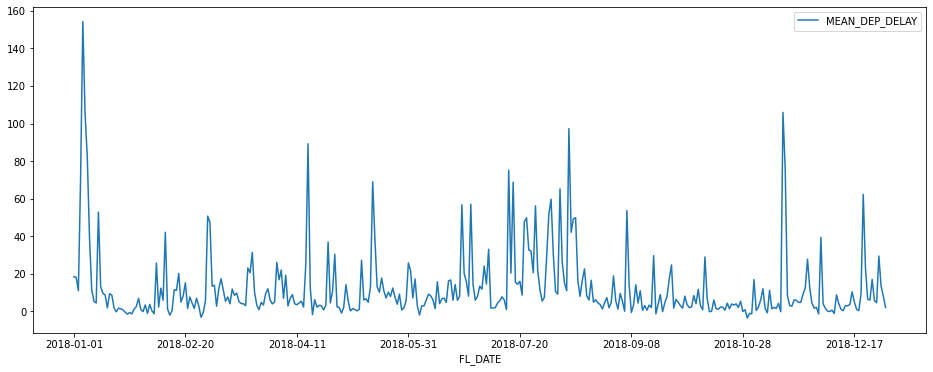

In [61]:
# Ventana temporal para el promedio y multiplo de sigma para definir upper and lower bounds
wind = 60
sigma = 2

data['lower_bound'] = data['MEAN_DEP_DELAY'].rolling(window=wind)\
    .mean() - (sigma * data['MEAN_DEP_DELAY'].rolling(window=wind).std())

data['upper_bound'] = data['MEAN_DEP_DELAY'].rolling(window=wind)\
    .mean() + (sigma * data['MEAN_DEP_DELAY'].rolling(window=wind).std())

data.plot(x='FL_DATE', y='MEAN_DEP_DELAY')
#data.plot()

In [97]:
#data.drop('lower_bound', axis=1, inplace=True)

/tmp/ipykernel_530676/17784725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('suelo', axis=1, inplace=True)


<AxesSubplot:>

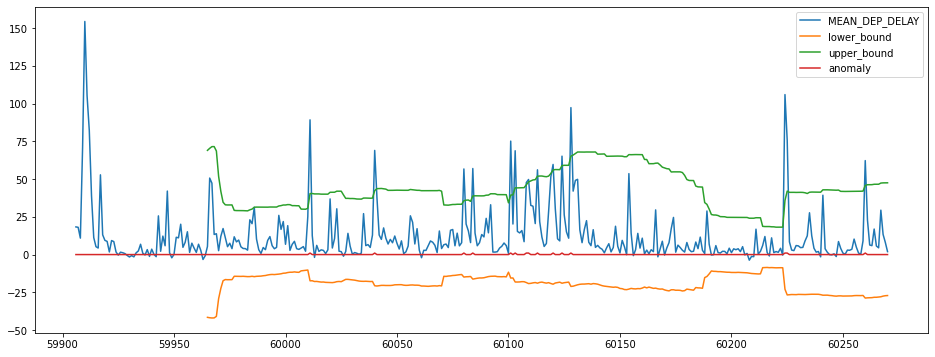

In [62]:
data["anomaly"] = data.apply(lambda row: 1 if (row['MEAN_DEP_DELAY']>=row["upper_bound"]) else 0, axis=1)
data.plot()

In [63]:
data[data["anomaly"]>0].count()

ORIGIN            15
FL_DATE           15
MEAN_DEP_DELAY    15
lower_bound       15
upper_bound       15
anomaly           15
dtype: int64

In [64]:
print("Total detected anomalies: {}".format(data[data["anomaly"]>0].shape[0])) 
data[data["anomaly"]>0].head(20)

Total detected anomalies: 15


,ORIGIN,FL_DATE,MEAN_DEP_DELAY,lower_bound,upper_bound,anomaly
60011,JFK,2018-04-16,89.207273,-17.369229,40.390346,1
60040,JFK,2018-05-15,68.961290,-20.663058,42.355868,1
60080,JFK,2018-06-24,56.687671,-14.896431,35.672569,1
60084,JFK,2018-06-28,56.978261,-16.259606,38.811921,1
60101,JFK,2018-07-15,75.128743,-15.536726,39.378521,1
60103,JFK,2018-07-17,68.751724,-18.162209,44.202395,1
60108,JFK,2018-07-22,47.687500,-18.528386,46.183755,1
60109,JFK,2018-07-23,49.711429,-19.200757,48.103613,1
60113,JFK,2018-07-27,56.128617,-18.944994,51.862345,1
60120,JFK,2018-08-03,59.673469,-19.625220,56.018406,1
